In [13]:
import numpy as np
import matplotlib.pyplot as plt
import math, random

In [14]:
#Homework #1  Number of samples vs. uncertainty.

In [15]:
def mean(x):
    """
    Computes the arithmetic mean of sequence x.
    """
    sum = 0
    N = len(x)
    for i in range(N):
        sum = sum + x[i]
    return sum/N
    

In [16]:
mean([0,1,2,3,4,5,6,7,8,9])

4.5

In [23]:
def sample_std(x):
    """
    Computes the sample standard deviation of sequence x,
    assuming that each x[i] is a sample from a population.
    """
    xmean = mean(x)
    sd = 0
    N = len(x)
    for i in range(N):
        sd = sd + (x[i]-xmean)**2
    sd = math.sqrt(sd/(N-1))
    return sd

In [24]:
sample_std([0,1,2,3,4,5,6,7,8,9])

3.0276503540974917

In [19]:
x = [0,1,2,3,4,5,6,7,8,9]
print(mean(x))
print(sample_std(x))

4.5
3.0276503540974917


In [20]:
print(np.mean(x))
print(np.std(x, ddof=1))

4.5
3.0276503540974917


In [25]:
x = np.random.randint(11, size=100)
xl = x.tolist()
%timeit mean(xl)

5.61 µs ± 44.6 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [26]:
%timeit np.mean(xl)

14.7 µs ± 265 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [27]:
%timeit np.mean(x)

7.31 µs ± 207 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [28]:
%timeit sample_std(xl)

19.8 µs ± 737 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [29]:
%timeit np.std(x, ddof=1)

24 µs ± 1.75 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [30]:
?np.random.randint

In [31]:
def create_mean_sd_lists(N_samples, M_rounds):
    """
    1. Calculate mean and sample standard deviation of N_samples drawn from [0,100] uniformly.
    2. Do step 1 for a total of M_rounds times.
    3. Store the mean's and sample standard deviation's calculated in step 2 in (means, stds)
    4. returns (means, stds)    
    """
    means = []
    stds = []
    for round in range(M_rounds):
        x = [random.randint(0,100) for k in range(N_samples)]
        means.append(mean(x))
        stds.append(sample_std(x))
    return (means, stds)

def create_mean_sd_lists_numpy(N_samples, M_rounds):
    """
    Perform the same task as create_mean_sd_lists() but with numpy's built-in functions.
    It works by creating a 2-D array then calculates mean and standard deviation by row.
    """
    y = np.random.randint(101, size=(M_rounds,N_samples))
    means = np.mean(y, axis=1) #axis=1 calculates by row.  axis=0 calculates by column.
    stds = np.std(y, axis=1, ddof=1) #ddof=1 is sample std. ddof=0 or omitted is population std.
    return (means, stds)
        
        

In [32]:
%timeit create_mean_sd_lists(40, 1000)

55.9 ms ± 362 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [33]:
%timeit create_mean_sd_lists_numpy(40, 1000)

611 µs ± 17.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [34]:
def plot_mean_sd_histogram(means, stds):
    plt.hist(means, color='black', label='Hist. of means' )
    plt.legend(loc='best')
    plt.show()
    plt.hist(stds, color='blue', label='Hist. of stdev')
    plt.legend(loc='best')
    plt.show()

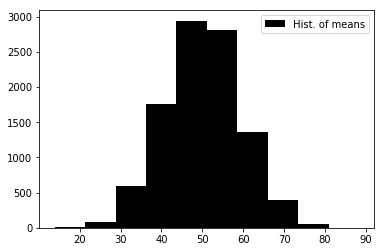

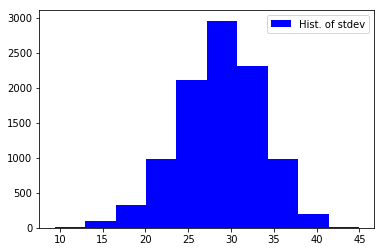

In [35]:
(means, stds) = create_mean_sd_lists(10, 10000)
plot_mean_sd_histogram(means, stds)

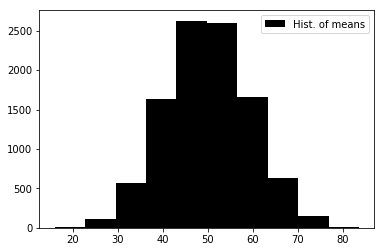

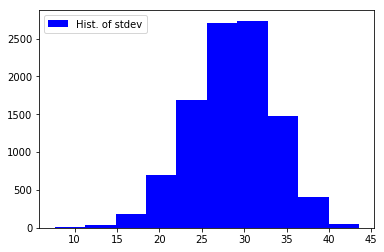

In [36]:
(means, stds) = create_mean_sd_lists_numpy(10, 10000)
plot_mean_sd_histogram(means, stds)

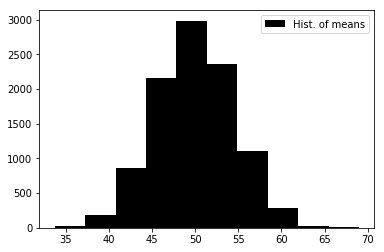

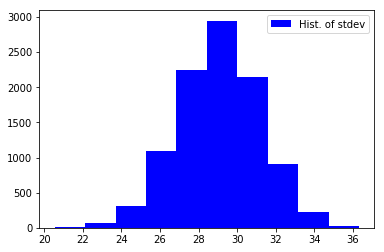

In [37]:
(means, stds) = create_mean_sd_lists_numpy(40, 10000)
plot_mean_sd_histogram(means, stds)

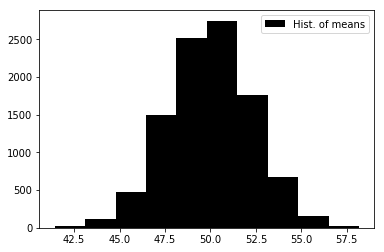

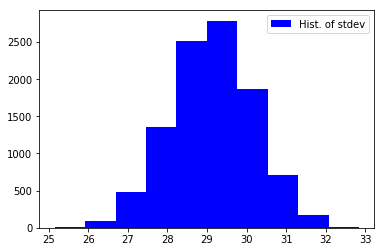

In [38]:
(means, stds) = create_mean_sd_lists_numpy(160, 10000)
plot_mean_sd_histogram(means, stds)

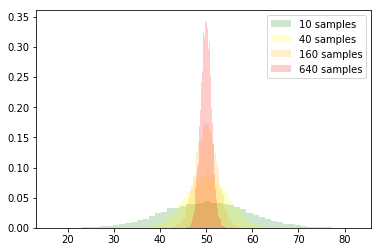

In [53]:
#It's more instructive to plot all histogram of estimated means together in one graph.
M_rounds = 10000
#colors = ['red','orange','yellow', 'green']
colors = ['green','yellow','orange','red']
samples = [10, 40, 160, 640]
#samples = [640, 160, 40, 10]
for i in range(len(samples)):
    N_samples = samples[i]
    c = colors[i]
    y = np.random.randint(101, size=(M_rounds,N_samples))
    means = np.mean(y, axis=1) #axis=1 calculates by row.  axis=0 calculates by column.
    #stds = np.std(y, axis=1, ddof=1) #ddof=1 is sample std. ddof=0 or omitted is population std.
    plt.hist(means, bins=50, color=c, alpha=0.2, density=True,label=str(N_samples) + ' samples')
    plt.legend(loc='upper right')
plt.show()

In [40]:
#Homework #2
population = np.random.randint(101, size=100000) #https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html#numpy.random.randint
print('Population contains {} elements'.format(len(population)))
mu = np.mean(population)
sigma = np.std(population)
print('Population mean = {:.2f}. Population std. = {:.2f}'.format(mu, sigma))

Population contains 100000 elements
Population mean = 50.04. Population std. = 29.22


In [41]:
N_samples = 10
samp = np.random.choice(population,size=N_samples) #https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.choice.html
print('{} samples.'.format(N_samples))
mean = np.mean(samp)
std = np.std(samp, ddof=1)
print('Sample mean = {:.2f}. Sample std. = {:.2f}'.format(mean, std ))
print('Est. population mean = Sample mean ± Sample std/sqrt(10) = {:.2f} ± {:.2f}'.format(mean,std/math.sqrt(N_samples)))

10 samples.
Sample mean = 23.40. Sample std. = 20.87
Est. population mean = Sample mean ± Sample std/sqrt(10) = 23.40 ± 6.60


In [42]:
samples = [10, 40, 1000]
for N_samples in samples:
    samp = np.random.choice(population,size=N_samples) #https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.choice.html
    print('{} samples:'.format(N_samples))
    mean = np.mean(samp)
    std = np.std(samp, ddof=1)
    print('Sample mean = {:.2f}. Sample std. = {:.2f}'.format(mean, std ))
    print('Est. population mean = Sample mean ± Sample std/sqrt({}) = {:.2f} ± {:.2f}'.format(N_samples,mean,std/math.sqrt(N_samples)))
    print('Est. population std. = {:.2f}'.format(std))
    print('-'*40)

10 samples:
Sample mean = 45.00. Sample std. = 32.96
Est. population mean = Sample mean ± Sample std/sqrt(10) = 45.00 ± 10.42
Est. population std. = 32.96
----------------------------------------
40 samples:
Sample mean = 45.33. Sample std. = 29.04
Est. population mean = Sample mean ± Sample std/sqrt(40) = 45.33 ± 4.59
Est. population std. = 29.04
----------------------------------------
1000 samples:
Sample mean = 51.20. Sample std. = 29.57
Est. population mean = Sample mean ± Sample std/sqrt(1000) = 51.20 ± 0.94
Est. population std. = 29.57
----------------------------------------


In [43]:
#In class.  Sample from Normal Distribution.


In [44]:
samples = [3, 10, 40, 1000, 10000]
population_mean = 0.3
population_std = 1.0
for N_samples in samples:
    samp = np.random.normal(population_mean,population_std, size=N_samples)
    print('{} samples:'.format(N_samples))
    mean = np.mean(samp)
    std = np.std(samp, ddof=1)
    print('Sample mean = {:.2f}; Sample std. = {:.2f}'.format(mean, std ))
    print('Est. population mean = Sample mean ± Sample std/sqrt(10) = {:.2f} ± {:.2f}'.format(mean,std/math.sqrt(N_samples)))
    print('Est. population std. = {:.2f}'.format(std))
    print('-'*40)

3 samples:
Sample mean = 0.22; Sample std. = 1.65
Est. population mean = Sample mean ± Sample std/sqrt(10) = 0.22 ± 0.95
Est. population std. = 1.65
----------------------------------------
10 samples:
Sample mean = 0.18; Sample std. = 1.19
Est. population mean = Sample mean ± Sample std/sqrt(10) = 0.18 ± 0.38
Est. population std. = 1.19
----------------------------------------
40 samples:
Sample mean = 0.47; Sample std. = 1.07
Est. population mean = Sample mean ± Sample std/sqrt(10) = 0.47 ± 0.17
Est. population std. = 1.07
----------------------------------------
1000 samples:
Sample mean = 0.28; Sample std. = 0.98
Est. population mean = Sample mean ± Sample std/sqrt(10) = 0.28 ± 0.03
Est. population std. = 0.98
----------------------------------------
10000 samples:
Sample mean = 0.30; Sample std. = 1.00
Est. population mean = Sample mean ± Sample std/sqrt(10) = 0.30 ± 0.01
Est. population std. = 1.00
----------------------------------------


In [45]:
samp = np.random.normal(population_mean,population_std, size=10)
samp

array([ 0.34671607,  0.85031606,  0.76996598,  1.31201174, -0.31385182,
        1.40591855,  0.69646889, -0.39241788,  1.13427384, -1.73803867])

In [46]:
np.mean(samp)

0.40713627526450813

In [47]:
np.std(samp, ddof=1)/math.sqrt(10)

0.30770473915824814

In [48]:
samp = np.random.normal(population_mean,population_std, size=100)
samp;

In [49]:
np.mean(samp)

0.26475014088587484

In [50]:
np.std(samp, ddof=1)/math.sqrt(100)

0.09900972799665145

In [51]:
(np.mean([132,134,134])-130)/(np.std([132,134,134], ddof=1)/math.sqrt(3))

5.000000000000014

In [52]:
np.std([132,134,134], ddof=1)

1.1547005383792515

In [54]:
forehead = [33.4, 34.6, 33.2, 34.3, 33.8, 34, 32, 31.6]
mouth = [33.3, 34.4, 33.8, 33.5, 33.8, 31.9, 32.8, 33.9]

In [58]:
mean_forehead = np.mean(forehead)
mean_forehead

33.3625

In [59]:
mean_mouth = np.mean(mouth)
mean_mouth

33.425

In [60]:
sampleSD_forehead = np.std(forehead, ddof = 1)
sampleSD_forehead

1.068961445248878

In [61]:
sampleSD_mouth = np.std(mouth, ddof = 1)
sampleSD_mouth

0.7741354624907157

In [65]:
SEM_forehead = sampleSD_forehead/np.sqrt(len(forehead))
SEM_forehead

0.37793494338122696

In [66]:
SEM_mouth = sampleSD_mouth/np.sqrt(len(mouth))
SEM_mouth

0.2736982175420846

In [68]:
def estimate_mean_with_its_uncertainty(data):
    m = np.mean(data)
    sd = np.std(data, ddof=1)
    sem = sd/np.sqrt(len(data))
    return (m, sem)

In [69]:
women_temp_forehead = [33.4, 34.2]
men_temp_forehead = [34.3, 34.3, 34.4, 34.1, 34.3]

In [70]:
estimate_mean_with_its_uncertainty(women_temp_forehead)

(33.8, 0.4000000000000021)

In [71]:
estimate_mean_with_its_uncertainty(men_temp_forehead)

(34.279999999999994, 0.04898979485566295)

In [72]:
import numpy as np
def create_binary_population(percents=50,size=1000000,shuffle=False):
    size1 = int(percents/100 * size)
    size2 = size - size1
    a1 = np.ones(size1)
    a2 = np.zeros(size2)
    population = np.concatenate((a1, a2))
    if shuffle:
        np.random.shuffle(population)
    return(population)

In [73]:
interviews = create_binary_population(65, 100)
interviews

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [74]:
np.mean(interviews)

0.65

In [75]:
np.std(interviews, ddof=1)

0.4793724854411022

In [76]:
interviews = create_binary_population(65, 100000)



In [77]:
np.mean(interviews)

0.65

In [78]:
np.std(interviews, ddof=1)

0.47697198557436293

In [79]:
np.std(interviews, ddof=1) / np.sqrt(100000)

0.0015083178545079623

In [80]:
np.random.normal(0, 1)

-0.21004409626711562

In [93]:
normal_samples = np.random.normal(0,1, 1000000)

In [94]:
len(normal_samples)

1000000

In [99]:
(len(normal_samples[normal_samples < 1]) - len(normal_samples[normal_samples < -1]))   / len(normal_samples)

0.682033

In [100]:
(len(normal_samples[normal_samples < 2]) - len(normal_samples[normal_samples < -2]))   / len(normal_samples)

0.954198

In [101]:
(len(normal_samples[normal_samples < 3]) - len(normal_samples[normal_samples < -3]))   / len(normal_samples)

0.997307

In [104]:
normal_samples = np.random.normal(0,1, 1000000)
print((len(normal_samples[normal_samples < 1]) - len(normal_samples[normal_samples < -1]))   / len(normal_samples))
print((len(normal_samples[normal_samples < 2]) - len(normal_samples[normal_samples < -2]))   / len(normal_samples)
)
print((len(normal_samples[normal_samples < 3]) - len(normal_samples[normal_samples < -3]))   / len(normal_samples))

0.682943
0.954262
0.997239


In [105]:
normal_samples = np.random.normal(0,1, 1000)
print((len(normal_samples[normal_samples < 1]) - len(normal_samples[normal_samples < -1]))   / len(normal_samples))
print((len(normal_samples[normal_samples < 2]) - len(normal_samples[normal_samples < -2]))   / len(normal_samples)
)
print((len(normal_samples[normal_samples < 3]) - len(normal_samples[normal_samples < -3]))   / len(normal_samples))

0.683
0.956
0.997


In [106]:
normal_samples = np.random.normal(0,1, 10000000)
print((len(normal_samples[normal_samples < 1]) - len(normal_samples[normal_samples < -1]))   / len(normal_samples))
print((len(normal_samples[normal_samples < 2]) - len(normal_samples[normal_samples < -2]))   / len(normal_samples)
)
print((len(normal_samples[normal_samples < 3]) - len(normal_samples[normal_samples < -3]))   / len(normal_samples))

0.6827145
0.9545446
0.9972886


In [112]:
mercuryInSharkFin = [0.01, 0.01, 0.01, 10.92, 21.02, 2.18, 9.26, 11.99, 0.57, 4.18]
mean_mercury = np.mean(mercuryInSharkFin)
sample_sd_mercury = np.std(mercuryInSharkFin, ddof =1)
safe_mercury_level = 0.05
t_score_mercury = (mean_mercury-safe_mercury_level)/(sample_sd_mercury/np.sqrt(len(mercuryInSharkFin)))

In [113]:
print(mean_mercury, sample_sd_mercury)
print(t_score_mercury)

6.015000000000001 7.081605671660127
2.6636595028712424


In [120]:
mercury_t = np.random.standard_t(len(mercuryInSharkFin)-1, 10000000)

In [121]:
(len(mercury_t[mercury_t>t_score_mercury]))/len(mercury_t)

0.0129428